In [4]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np


In [104]:
#  Add file as df
file_df = pd.read_csv('Resources/Faked_Attendance_Data.csv') 
file_df.head()

# Clean data
file_df['TYPE'] = file_df['TYPE'].replace({'tardy': 'Tardy'})

# Create DFs that separate Infractions from Documents
infractions_df = file_df.loc[~((file_df['Doc VS Infraction']=='Document'))]
document_df = file_df.loc[~((file_df['Doc VS Infraction']=='Infraction')|(file_df['TYPE']=='Clean Slate'))]
file_df.head()

,E.I.N.,DATE,TYPE,Casino,Administrator,Excused,Severity,Doc VS Infraction
0,Employee 527,9/6/2019,Clean Slate,Location 5,Supervisor 1,NaN,59,Document
1,Employee 24,10/24/2019,Clean Slate,Location 6,Supervisor 2,NaN,59,Document
2,Employee 559,8/22/2019,Final Written,Location 6,Supervisor 3,NaN,89,Document
3,Employee 570,9/16/2019,Verbal,Location 6,Supervisor 4,NaN,29,Document
4,Employee 655,11/26/2019,Final Written,Location 5,Supervisor 5,NaN,89,Document


In [160]:

print(file_df.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>E.I.N.</th>
      <th>DATE</th>
      <th>TYPE</th>
      <th>Casino</th>
      <th>Administrator</th>
      <th>Excused</th>
      <th>Severity</th>
      <th>Doc VS Infraction</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Employee 527</td>
      <td>9/6/2019</td>
      <td>Clean Slate</td>
      <td>Location 5</td>
      <td>Supervisor 1</td>
      <td>NaN</td>
      <td>59</td>
      <td>Document</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Employee 24</td>
      <td>10/24/2019</td>
      <td>Clean Slate</td>
      <td>Location 6</td>
      <td>Supervisor 2</td>
      <td>NaN</td>
      <td>59</td>
      <td>Document</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Employee 559</td>
      <td>8/22/2019</td>
      <td>Final Written</td>
      <td>Location 6</td>
      <td>Supervisor 3</td>
      <td>NaN</td>
      <td>89</td>
      <td>Documen

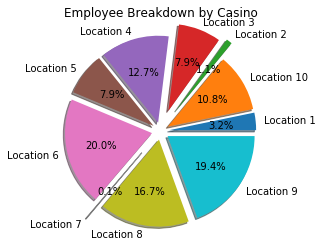

In [149]:
casino_df = file_df.groupby('Casino')


emp_count = casino_df['E.I.N.'].nunique()

plot = emp_count.plot.pie(y='E.I.N.', title="Employee Breakdown by Casino", legend=False, \
                   autopct='%1.1f%%',explode=(0.1,0.1,0.3,0.25,0.1,0.1,0.1,0.3,0.1,0.1), \
                   shadow=True, startangle=0)
plt.axis('off')
plt.savefig('Resources/assets/images/Employee_Count.png')                   


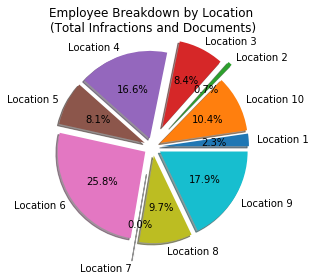

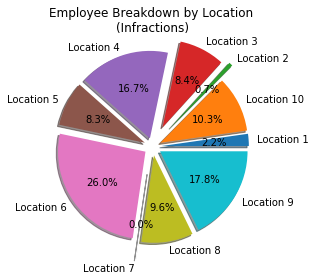

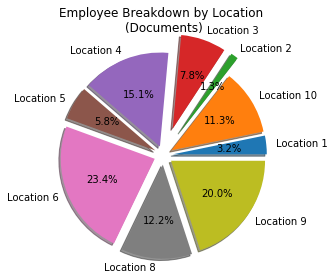

In [157]:

plot = casino_df.count().plot.pie(y='TYPE', title="Employee Breakdown by Location \n(Total Infractions and Documents)", legend=False, \
                   autopct='%1.1f%%',explode=(0.1,0.1,0.3,0.25,0.1,0.1,0.1,0.3,0.1,0.1), \
                   shadow=True, startangle=0)
plt.axis('off')

plt.tight_layout()
plt.savefig('Resources/assets/images/Employee_Breakdown.png')       

plot = infractions_df.groupby('Casino').count().plot.pie(y='TYPE', title="Employee Breakdown by Location \n(Infractions)", legend=False, \
                   autopct='%1.1f%%',explode=(0.1,0.1,0.3,0.25,0.1,0.1,0.1,0.3,0.1,0.1), \
                   shadow=True, startangle=0)
plt.axis('off')

plt.tight_layout()
plt.savefig('Resources/assets/images/Employee_Breakdown_Infractions.png')   

plot = document_df.groupby('Casino').count().plot.pie(y='TYPE', title="Employee Breakdown by Location \n(Documents)", legend=False, \
                   autopct='%1.1f%%',explode=(0.1,0.1,0.3,0.3,0.1,0.1,0.1,0.1,0.1), \
                   shadow=True, startangle=0)
plt.axis('off')

plt.tight_layout()
plt.savefig('Resources/assets/images/Employee_Breakdown_Documents.png')   

In [ ]:
patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [119]:
casino_df.count()

,E.I.N.,DATE,TYPE,Administrator,Excused,Severity,Doc VS Infraction
Casino,,,,,,,
Location 1,258,258,258,258,81,258,258
Location 10,1163,1163,1163,1163,562,1163,1163
Location 2,83,83,83,83,25,83,83
Location 3,936,936,936,936,370,936,936
Location 4,1857,1857,1857,1857,1005,1857,1857
Location 5,908,908,908,908,586,908,908
Location 6,2886,2886,2886,2886,1708,2886,2886
Location 7,1,1,1,1,1,1,1
Location 8,1090,1090,1090,1090,558,1090,1090


Text(24.0, 0.5, '# of Documents')

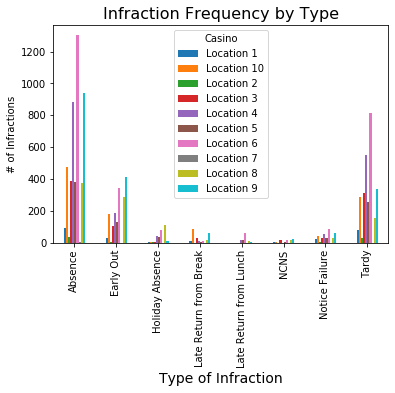

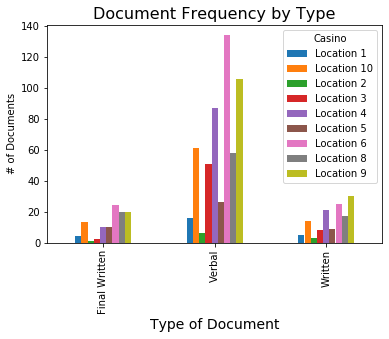

In [105]:



# Breakdown of Infraction Types by Casino
infractions_df.groupby('Casino').TYPE.value_counts().unstack(0).plot.bar()

plt.savefig('Resources/assets/images/infaction_count.png')
plt.title('Infraction Frequency by Type', fontsize=16)
plt.xlabel('Type of Infraction', fontsize=14)
plt.ylabel('# of Infractions', fontsize=10)

document_df.groupby('Casino').TYPE.value_counts().unstack(0).plot.bar()
plt.savefig('Resources/assets/images/document_count.png')
plt.title('Document Frequency by Type', fontsize=16)
plt.xlabel('Type of Document', fontsize=14)
plt.ylabel('# of Documents', fontsize=10)

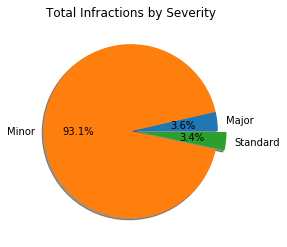

In [114]:
by_severity = infractions_df.groupby('Severity').count()


plot = by_severity.plot.pie(y='TYPE', title="Total Infractions by Severity", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)
plt.axis('off')
plt.savefig('Resources/assets/images/severity_count.png')


In [110]:
dates = ["July - 2019","Aug - 2019","Sept - 2019" ,"Oct - 2019","Nov - 2019","Dec - 2019","Jan - 2020","Feb - 2020","Mar - 2020" ,"April - 2020","May - 2020","Jun - 2020"]
file_df.plot.scatter( x=dates,y="Doc VS Infraction")


KeyError: "None of [Index(['July - 2019', 'Aug - 2019', 'Sept - 2019', 'Oct - 2019', 'Nov - 2019',\n       'Dec - 2019', 'Jan - 2020', 'Feb - 2020', 'Mar - 2020', 'April - 2020',\n       'May - 2020', 'Jun - 2020'],\n      dtype='object')] are in the [columns]"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F6DD3F3C8>,
      dtype=object)

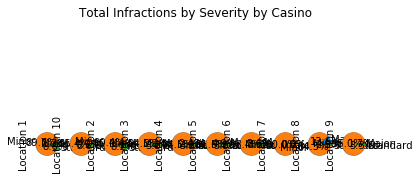

In [97]:

by_severity = infractions_df.groupby('Severity').count()
